# Data Understanding<a class="tocSkip">
## Ciencia de Datos - Procesamiento de Señales II <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

<H1 style="text-align:center;">
Data Understanding
</H1>
<hr style="height:5px;">

## Histograms
<hr style="height:2px;">

Histograms are generated by the `hist` function in the `matplotlib` library. Here, we use the Iris data set, available as part of the **Scikit-learn** (`sklearn`) library, a library of machine learning functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# loading the iris data set
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)   # features data frame
X.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
y = pd.DataFrame(iris.target)  # target data frame
y.columns = ['species']
target_names = iris.target_names

The data set has been read into a data frame object `X`, a class of object available in the `pandas` library. In addition, the target describing different species is stored in another data frame `y`. The feature names have been assigned to this data frame as column names. We generate a histogram of the petal length with the following code.

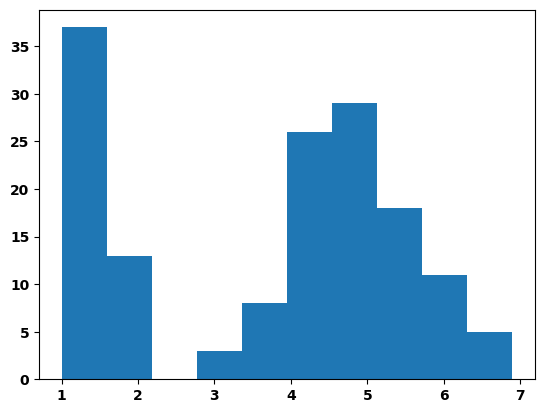

In [2]:
# histogram of the petal length
plt.hist(X['petal length'])
plt.show()

Note that you need to run `plt.show()` to display the figure on your screen. You may notice that the histogram includes only a small number of bars, despite the large amount of data!  You can change the number of bins, or the number of bars on a histogram by the second parameter.

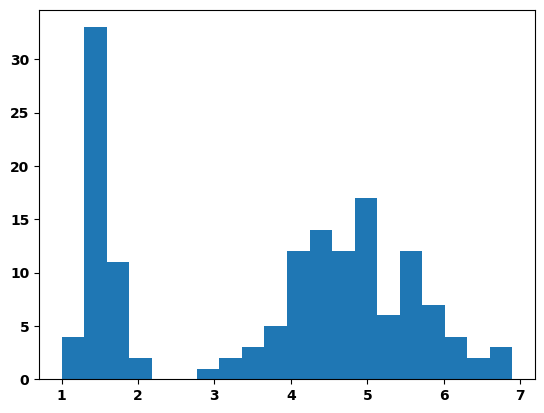

In [3]:
# histogram with 20 bins
plt.hist(X['petal length'], 20)
plt.show()

## Boxplots
<hr style="height:2px;">

Boxplots can be generated by the `boxplot` method associated with data frame objects in `pandas`. You can specify a particular feature with the `columns` parameter. Here is a boxplot of the the petal length from the Iris data set.

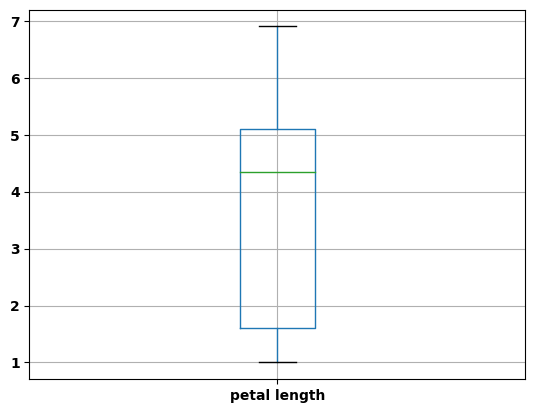

In [4]:
# box plot of the petal length
X.boxplot(column='petal length')
plt.show()

Or, we can generate boxplots of the petal length and width.

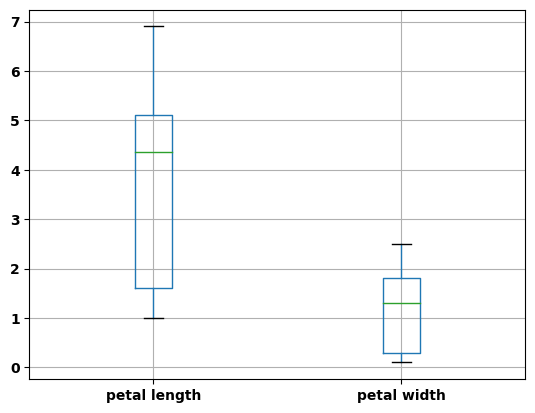

In [5]:
# box plot of the petal length & width
X.boxplot(column=['petal length', 'petal width'])
plt.show()

Or all the features in the data set. 

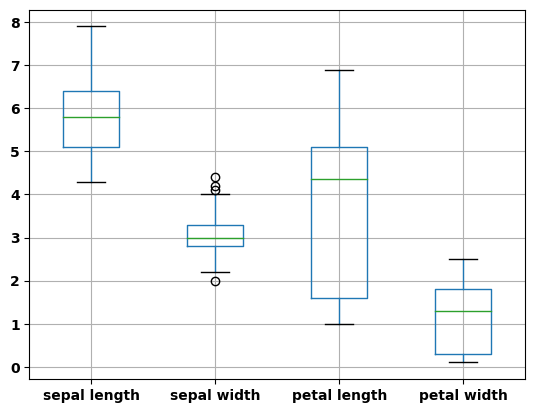

In [6]:
# box plot of all the features
X.boxplot()
plt.show()

We can generate boxplots with notches by specifying the option `notch=True`. 

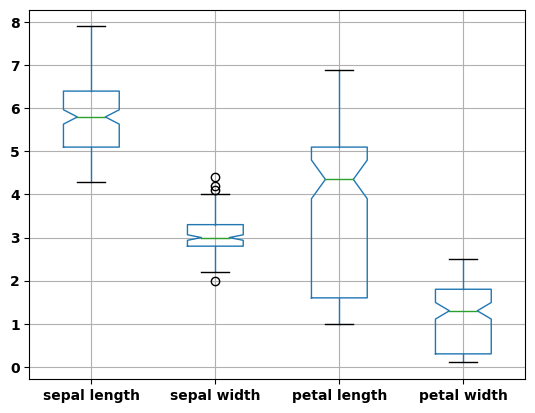

In [7]:
# notched box boxplots
X.boxplot(notch=True)
plt.show()

Finally, the `describe` method, associated with a data frame objects, produces various descriptive statistics (mean, median, quartiles, etc.) for each column.

In [8]:
# describing various statsitics
print(X.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Scatter plots
<hr style="height:2px;">

Scatter plots can be generated by the `plot.scatter` method associated with data frame objects in `pandas`. You can specify the columns represented in the x- and y-axes with parameters `x` and `y`, respectively. As an example, we plot the petal width against the petal length.

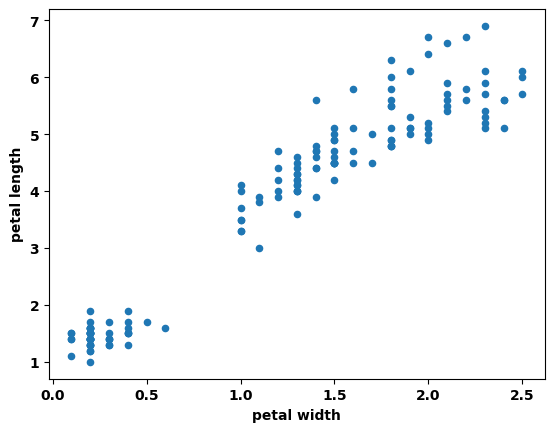

In [9]:
# plotting petal width vs length (as a method)
X.plot.scatter(x='petal width', y='petal length')
plt.show()

Alternatively, we can produce a scatter plot using the `scatter` function as part of the `matplotlib.pyplot` library. A scatter plot of the petal width v.s. length is produced with the `plot` function.

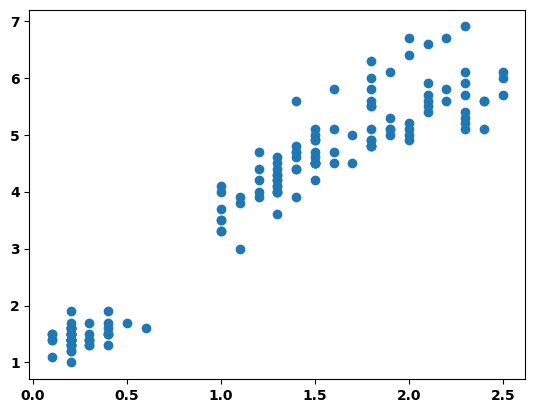

In [10]:
# plotting petal width vs length (as a function)
plt.scatter(X['petal width'], X['petal length'])
plt.show()

All features can be plotted against each other with the `plotting.scatter_matrix` method associated with a data frame object. Here, all features in the Iris data are plotted in a scatter plot matrix.

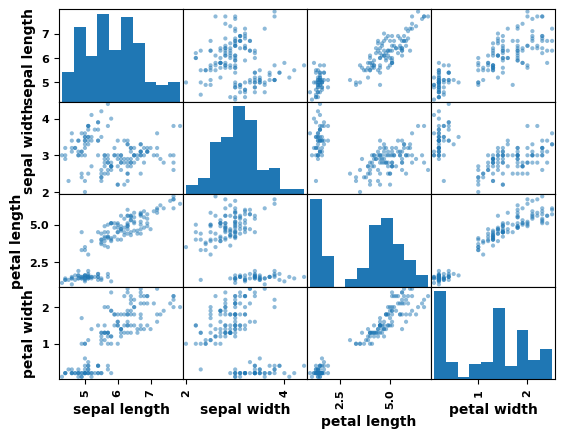

In [11]:
# scatter plot matrix
pd.plotting.scatter_matrix(X)
plt.show()

Notice that all data points are plotted in the same color. However, you may want to plot data points corresponding to different species in different colors. To do so, we provide the information on species contained in the data frame column `y['species']` to the parameter `c` in the `plotting.scatter_matrix` method.

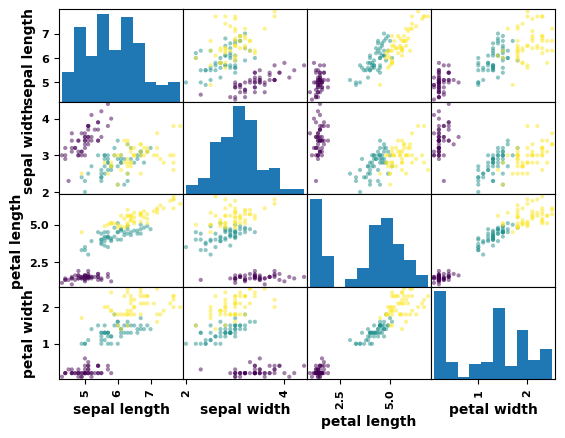

In [12]:
# scatter plot matrix with different colors for species
pd.plotting.scatter_matrix(X, c=y['species'])
plt.show()

## Principal component analysis
<hr style="height:2px;">

In Scikit-learn, a Python library for machine learning tools, many algorithms are implemented as objects, rather than functions. In a nutshell, an object is a combination of data, a collection of functions associated with the data (referred as *methods*), as well as the properties of the object (referred as *attributes*).  To demonstrate this idea, we apply a z-score transformation, or normalize, the Iris data in preparation for a principal component analysis. In particular, we create a normalization object available as a `StandardScaler` object under the `sklearn.preprocessing` library.

In [13]:
from sklearn.preprocessing import StandardScaler

# defining an normalization object
normData = StandardScaler()

Next, we fit the feature data `X` to this newly defined normalization transformation object `normData`, with the `fit` method.

In [14]:
# fitting the data to the normalization object
normData.fit(X)

StandardScaler()

Now the normalization object is ready, meaning that means and standard deviations have been calculated for each feature in the provided data set. Now we apply the actual transformation by the `transform` method to transform the data set `X`. The resulting normalized features are stored in `X_norm`.

In [15]:
# applying the normalization transformation to the data
X_norm = normData.transform(X)

To perform these processes, you can also use the `fit_transform` method, which is a combination of the `fit` and `transform` methods performed at once.

In [16]:
X_norm = StandardScaler().fit_transform(X)

Now we apply PCA to the normalized data `X_norm`. This is done by creating a `PCA` transformation object, available as part of the `sklearn.decomposition` library. Then performing the `fit_transform` method to calculate principal components.

In [17]:
from sklearn.decomposition import PCA

# applying PCA
pca = PCA()  # creating a PCA transformation ojbect
X_pc = pca.fit_transform(X_norm) # fit the data, and get PCs

This produces an array `X_pc` with 150 rows and 4 columns (corresponding to 4 PCs).

In [18]:
X_pc.shape

(150, 4)

The attribute `explained_variance_ratio_` stores the amount of variability in the data explained by each PC. The first PC explains 73% of variability, whereas the second PC explains 23% of variability, and so on.

In [19]:
# proportion of the variance explained
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


We plot the first 2 PCs, representing the four original features in a 2D space. The first PC  (or the first column of `X_pc`, `X_pc[:,0]`) is plotted on the x-axis and the second PC (or the second column of `X_pc`, `X_pc[:,1]`) is plotted on the y-axis.

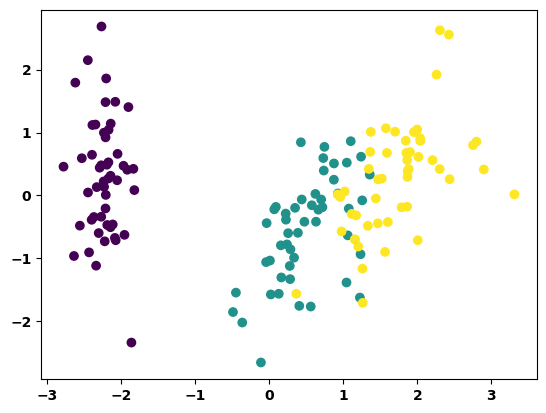

In [20]:
# plotting the first 2 principal compnonents
plt.scatter(X_pc[:,0], X_pc[:,1], c=y['species'])
plt.show()

## Multi-dimensional scaling
<hr style="height:2px;">

Multi-dimensional scaling is implemented as an `MDS` transformation object available in the `sklearn.manifold` library. Here, we define a transformation object `mds`, then use the `fit_transfrom` method to obtain the MDS-transformed coordinates as `X_mds`.

In [21]:
from sklearn.manifold import MDS

# applying MDS
mds = MDS()
X_mds = mds.fit_transform(X_norm)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


By default, the MDS transformation maps a higher-dimension space to a 2D space. We plot the transformation results in 2D.

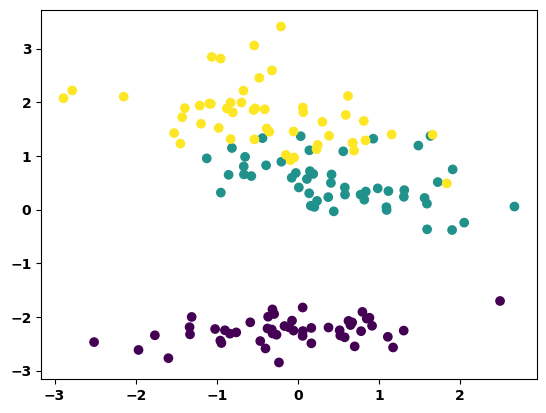

In [22]:
# plotting the MDS-transformed coordinates
plt.scatter(X_mds[:,0], X_mds[:,1], c=y['species'])
plt.show()

## Parallel coordinates plot
<hr style="height:2px;">

A parallel coordinates plot can be generated by the `plotting.parallel_coordinates` function available in the Pandas library. This function assumes that features and labels are stored in a same data frame. Thus, first we combine the feature data frame `X` and the target label data frame `y` with the `concat` function in Pandas. The resulting combined data frame `Xy` is then used in the parallel coordinates plot.

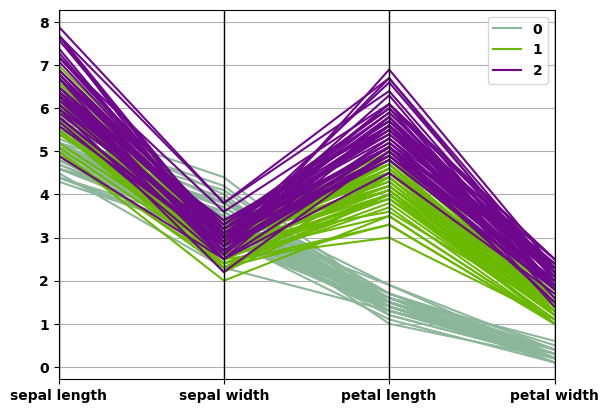

In [23]:
Xy = pd.concat([X,y], axis=1)
pd.plotting.parallel_coordinates(Xy,'species')
plt.show()

## Correlations
<hr style="height:2px;">

The Pearson, Spearman, and Kendall correlations can be calculated by the `pearsonr`, `spearmanr`, and `kendalltau` function available in the SciPy (scientific Python) library, respectively. These functions return the correlation value and the associated p-value (of testing whether the correlation is zero).

In [24]:
import scipy as sp

r_pearson, p_pearson = sp.stats.pearsonr(X['sepal length'], X['sepal width'])
r_spearman, p_spearman = sp.stats.spearmanr(X['sepal length'], X['sepal width'])
r_kendall, p_kendall = sp.stats.kendalltau(X['sepal length'], X['sepal width'])

The resulting correlation values are:

In [25]:
r_pearson

-0.11756978413300204

In [26]:
r_spearman

-0.166777658283235

In [27]:
r_kendall

-0.0769967881165167

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).